# The Perceptron

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs
import pandas as pd
from sklearn.metrics import accuracy_score
sbs.set_context('notebook')

def sigmoid(x):
    '''
    ranges from  0 to 1
    '''
    return 1 / (1 + np.exp(-x))

def relu(x):
    '''
    ranges from  0 to 1
    '''
    return np.where(x > 0, x, 0)

In [ ]:
class Perceptron:
    def __init__(self, num_inputs):
        self.w1 = np.random.random(num_inputs)
        self.b1 = 1
    
    def predict(self, X):
        # compute activation for input layer
        activation = np.dot(X, self.w1) + self.b1
        # non-linear transform
        fX = sigmoid(activation)
        # check threshold: for sigmoid and relu, use 0.5, for tanh, use 0
        y = np.where(fX >= 0.5, 1, -1)
        return y
    
    def fit(self, train_data, train_labels, num_epochs=20):
        models = []
        print("N. epochs",num_epochs)
        for epoch in range(1, num_epochs+1):
            print("Epoch:",epoch)
            for (X, y) in zip(train_data, train_labels):
                pred_label = self.predict(X)

                if pred_label != y:
                    print('update')
                    self.w1 = self.w1 + (X * y)
                    self.b1 = self.b1 + y

            models.append((self.w1, self.b1))

        return models

In [ ]:
# AND perceptron
perceptron = Perceptron(2)

and_data = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
and_labels = np.array([1, -1, -1, -1], dtype=np.int)

iters = perceptron.fit(and_data, and_labels, num_epochs=10)
and_predictions = perceptron.predict(and_data)

print(and_predictions)

print("Accuracy",accuracy_score(and_labels, and_predictions))
print()
print("Iterations:")
print(iters)

N. epochs 10
Epoch: 1
update
update
Epoch: 2
update
update
Epoch: 3
update
update
update
Epoch: 4
update
update
Epoch: 5
update
update
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
[ 1 -1 -1 -1]
Accuracy 1.0

Iterations:
[(array([-0.89721154, -0.07338296]), -1), (array([-0.89721154,  0.92661704]), -1), (array([-0.89721154,  0.92661704]), -2), (array([0.10278846, 0.92661704]), -2), (array([0.10278846, 1.92661704]), -2), (array([0.10278846, 1.92661704]), -2), (array([0.10278846, 1.92661704]), -2), (array([0.10278846, 1.92661704]), -2), (array([0.10278846, 1.92661704]), -2), (array([0.10278846, 1.92661704]), -2)]


## Exercise

Create OR data and rerun the perceptron

In [ ]:
# OR perceptron


But what about the XOR?

In [ ]:
# XOR perceptron
perceptron = Perceptron(2)
 
xor_data = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
xor_labels = np.array([1, -1, -1, 1], dtype=np.int)
 
iters = perceptron.fit(xor_data, xor_labels, num_epochs=10)
xor_predictions = perceptron.predict(xor_data)
 
print(xor_predictions)
 
print("Accuracy",accuracy_score(xor_labels, xor_predictions))
print()
print("Iterations:")
print(iters)

N. epochs 10
Epoch: 1
update
update
update
Epoch: 2
update
update
update
update
Epoch: 3
update
update
update
update
Epoch: 4
update
update
update
update
Epoch: 5
update
update
update
update
Epoch: 6
update
update
update
update
Epoch: 7
update
update
update
update
Epoch: 8
update
update
update
update
Epoch: 9
update
update
update
update
Epoch: 10
update
update
update
update
[-1 -1 -1  1]
Accuracy 0.75

Iterations:
[(array([-0.3149188 , -0.27923035]), 0), (array([-0.3149188 , -0.27923035]), 0), (array([-0.3149188 , -0.27923035]), 0), (array([-0.3149188 , -0.27923035]), 0), (array([-0.3149188 , -0.27923035]), 0), (array([-0.3149188 , -0.27923035]), 0), (array([-0.3149188 , -0.27923035]), 0), (array([-0.3149188 , -0.27923035]), 0), (array([-0.3149188 , -0.27923035]), 0), (array([-0.3149188 , -0.27923035]), 0)]


Perceptrons are **linear classifiers**. I.e., they can only find a perfect fit to **linearly seperable data**

If only first order features are used

# Multilayer perceptron to the rescue!
- Data that is distributed non-linearly (e.g. XOR) cannot be learned by perceptron
- At least not without tedious feature engineering

**Stacking several perceptrons increases expressive power!**

- learning intermediate/partial representations at intermediate layers

**Let's see how it works in `keras`**


<img src="https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png" width="20%" />

## Keras: Deep Learning library for Theano and TensorFlow

>Keras is a minimalist, highly modular neural networks library, written in Python and capable of running on top of either TensorFlow or Theano. 

>It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.
ref: https://keras.io/

In [ ]:
def gaussian_data(num, epsilon=1):
    '''
    generates a data set from two overlapping Gaussian point clouds
    '''
    x1_p1 = np.random.normal(1 + epsilon, size=num//2)
    x2_p1 = np.random.normal(1, size=num//2)

    x1_p2 = np.random.normal(-(1 + epsilon), size=num//2)
    x2_p2 = np.random.normal(-(1 + epsilon), size=num//2)

    x1 = np.concatenate([x1_p1, x1_p2])
    x2 = np.concatenate([x2_p1, x2_p2])

    labels = np.zeros((num, 2))
    labels[:num//2, 0] = 1
    labels[num//2:, 1] = 1
    return x1, x2, labels

def XOR_sample(sample_size, ratio=0.5, x1_p1_mean=25, x1_p2_mean=50, x2_p1_mean=5, x2_p2_mean=2, epsilon = 0.1):
    size1 = int(sample_size * ratio)
    size2 = sample_size - size1
    
    x1 = np.random.normal(loc=x1_p1_mean, size=size1//2)
    x1 = np.hstack((x1, np.random.normal(loc=-x1_p1_mean, size=size1//2)))   
    x1 = np.hstack((x1, np.random.normal(loc=x1_p2_mean, size=size2//2)))
    x1 = np.hstack((x1, np.random.normal(loc=-x1_p2_mean, size=size2//2)))
    
    x2 = np.random.normal(loc=x2_p1_mean, size=size1//2)
    x2 = np.hstack((x2, np.random.normal(loc=-x2_p1_mean, size=size1//2)))
    x2 = np.hstack((x2, np.random.normal(loc=x2_p2_mean, size=size2//2)))
    x2 = np.hstack((x2, np.random.normal(loc=-x2_p2_mean, size=size2//2)))
    
    labels = np.zeros((sample_size, 2))
    labels[:sample_size//2, 0] = 1
    labels[sample_size//2:, 1] = 1

    return x1, x2, labels


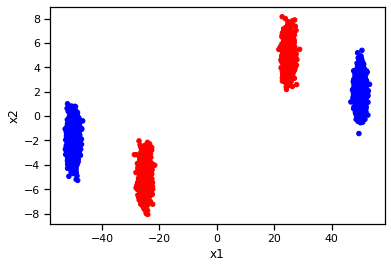

In [ ]:
# let's get some data
num_samples = 5000
half = num_samples//2
a,b,y = XOR_sample(num_samples)

X = np.vstack((a,b)).T

pd.DataFrame({'x1': a, 'x2': b}).plot.scatter(x='x1', y='x2', c=['red']*half + ['blue']*half);

In [ ]:
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense

# input: a sequence  of 2 integers
main_input = Input(shape=(2, ), name='main_input')

# add the output layer
output = Dense(2, activation='hard_sigmoid', name='output', kernel_initializer='glorot_uniform')(main_input)

# f(X) = sigmoid(X*W + b)

# the model is specified by connecting input and output
perceptron_keras = Model(inputs=[main_input], outputs=[output])

In [ ]:
perceptron_keras.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 2)]               0         
_________________________________________________________________
output (Dense)               (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.metrics import f1_score
perceptron_keras.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = perceptron_keras.fit(X, y,
                    epochs=15,
                    verbose=1,
                    validation_split=0.2
                )

loss, accuracy = perceptron_keras.evaluate(X, y,
                                           batch_size=20, 
                                           verbose=1)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Epoch 1/15
125/125 [==============================] - 1s 3ms/step - loss: 6.0225 - accuracy: 0.6349 - val_loss: 7.7125 - val_accuracy: 0.0000e+00
Epoch 2/15
125/125 [==============================] - 0s 2ms/step - loss: 7.6580 - accuracy: 0.6191 - val_loss: 7.7125 - val_accuracy: 0.0000e+00
Epoch 3/15
125/125 [==============================] - 0s 2ms/step - loss: 7.6574 - accuracy: 0.6236 - val_loss: 7.7125 - val_accuracy: 0.0000e+00
Epoch 4/15
125/125 [==============================] - 0s 2ms/step - loss: 7.6575 - accuracy: 0.6274 - val_loss: 7.7125 - val_accuracy: 0.0000e+00
Epoch 5/15
125/125 [==============================] - 0s 2ms/step - loss: 7.6573 - accuracy: 0.6257 - val_loss: 7.7125 - val_accuracy: 0.0000e+00
Epoch 6/15
125/125 [==============================] - 0s 2ms/step - loss: 7.6573 - accuracy: 0.6238 - val_loss: 7.7125 - val_accuracy: 0.0000e+00
Epoch 7/15
125/125 [==============================] - 0s 1ms/step - loss: 7.6581 - accuracy: 0.6147 - val_loss: 7.7125 - val

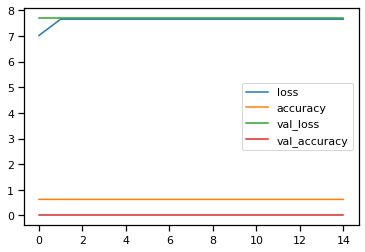

In [ ]:
pd.DataFrame(history.history).plot.line()

In [ ]:
predictions = perceptron_keras.predict(X).argmax(axis=1)
accuracy_score(y.argmax(axis=1), predictions)

0.5

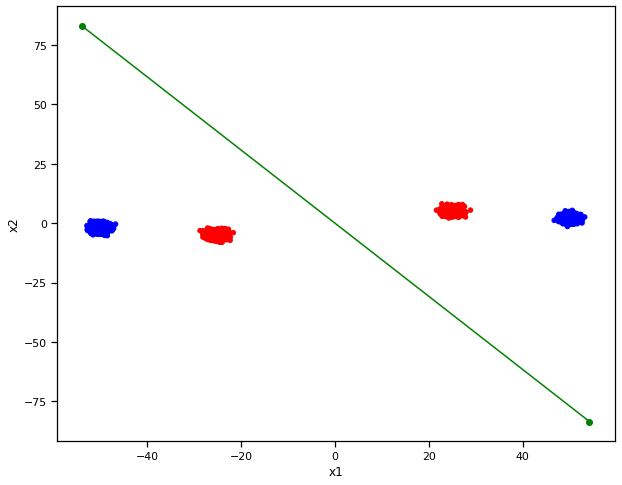

In [ ]:
def get_y(x, w1, w2, bias):
    '''
    compute y value for specific x, given the weights and bias
    (helper function for decision boundary)
    '''
    return ((-(x * w1) - bias) / w2)
    
fig, ax = plt.subplots(figsize=(10,8))
pd.DataFrame({'x1': a, 'x2': b}).plot.scatter(x='x1', y='x2', c=['red']*half + ['blue']*half, ax=ax);

(w1, w2), bias = perceptron_keras.get_weights()
xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1

ax.plot([xmin, xmax], [get_y(xmin, w1, w2, bias)[1], get_y(xmax, w1, w2, bias)[1]], marker='o', color='green');


## MLP

In [ ]:
# input: a sequence  of 2 integers
mlp_input = Input(shape=(2,), name='main_input')

# add a hidden layer
mlp_hidden = Dense(16, activation='relu', name='hidden', kernel_initializer='glorot_uniform')(mlp_input)

# add the output layer
mlp_output = Dense(2, activation='softmax', name='output', kernel_initializer='glorot_uniform')(mlp_hidden)

# the model is specified by connecting input and output
mlp = Model(inputs=[mlp_input], outputs=[mlp_output])

mlp.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 2)]               0         
_________________________________________________________________
hidden (Dense)               (None, 16)                48        
_________________________________________________________________
output (Dense)               (None, 2)                 34        
Total params: 82
Trainable params: 82
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras import optimizers

optimizer = optimizers.Adam(lr=0.001)

mlp.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy']
           )

mlp_history = mlp.fit(X, y,
                    epochs=50,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/50
125/125 [==============================] - 1s 3ms/step - loss: 2.8999 - accuracy: 0.4520 - val_loss: 2.7170 - val_accuracy: 0.0000e+00
Epoch 2/50
125/125 [==============================] - 0s 2ms/step - loss: 0.6150 - accuracy: 0.8485 - val_loss: 1.2884 - val_accuracy: 0.0000e+00
Epoch 3/50
125/125 [==============================] - 0s 2ms/step - loss: 0.3568 - accuracy: 0.9384 - val_loss: 0.4947 - val_accuracy: 0.9540
Epoch 4/50
125/125 [==============================] - 0s 2ms/step - loss: 0.2288 - accuracy: 0.9835 - val_loss: 0.3797 - val_accuracy: 0.9630
Epoch 5/50
125/125 [==============================] - 0s 2ms/step - loss: 0.1477 - accuracy: 0.9949 - val_loss: 0.2458 - val_accuracy: 0.9850
Epoch 6/50
125/125 [==============================] - 0s 2ms/step - loss: 0.1036 - accuracy: 0.9977 - val_loss: 0.1987 - val_accuracy: 0.9850
Epoch 7/50
125/125 [==============================] - 0s 2ms/step - loss: 0.0748 - accuracy: 0.9983 - val_loss: 0.1182 - val_accuracy: 0.996

In [ ]:
mlp_history = pd.DataFrame(mlp_history.history)
mlp_history


,loss,accuracy,val_loss,val_accuracy
0,2.112266,0.54550,2.716982,0.000
1,0.538100,0.89300,1.288429,0.000
2,0.323097,0.94550,0.494689,0.954
3,0.202353,0.98450,0.379695,0.963
4,0.135893,0.99525,0.245844,0.985
5,0.097702,0.99725,0.198730,0.985
6,0.073764,0.99750,0.118239,0.996
7,0.058110,0.99750,0.109688,0.993
8,0.047409,0.99725,0.076834,0.996
9,0.039454,0.99800,0.049863,0.999


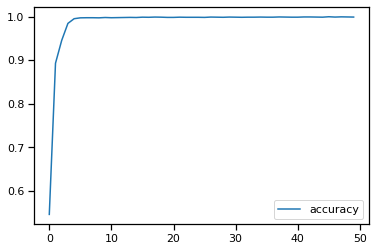

In [ ]:
mlp_history['accuracy'.split()].plot()

## Exercise

Take couple of minutes and try to play with the number of layers and the number of parameters in the layers.

<a name="kaggle"></a>
# Kaggle Challenge Data

>The Otto Group is one of the world’s biggest e-commerce companies, A consistent analysis of the performance of products is crucial. However, due to diverse global infrastructure, many identical products get classified differently.
For this competition, we have provided a dataset with 93 features for more than 200,000 products. The objective is to build a predictive model which is able to distinguish between our main product categories. 
Each row corresponds to a single product. There are a total of 93 numerical features, which represent counts of different events. All features have been obfuscated and will not be defined any further.

https://www.kaggle.com/c/otto-group-product-classification-challenge/data

## Data Preparation

### Utility functions

Utility functions to load Kaggle Otto Group Challenge Data.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils


def load_data(path, train=True):
    """Load data from a CSV File
    
    Parameters
    ----------
    path: str
        The path to the CSV file
        
    train: bool (default True)
        Decide whether or not data are *training data*.
        If True, some random shuffling is applied.
        
    Return
    ------
    X: numpy.ndarray 
        The data as a multi dimensional array of floats
    ids: numpy.ndarray
        A vector of ids for each sample
    """
    text = pd.read_csv(path, encoding = "ISO-8859-2")
    df = pd.read_csv(path)
    X = df.values.copy()
    if train:
        np.random.shuffle(X)  
        X, labels = X[:, 1:-1].astype(np.float32), X[:, -1]
        return X, labels
    else:
        X, ids = X[:, 1:].astype(np.float32), X[:, 0].astype(str)
        return X, ids
        
        
def preprocess_data(X, scaler=None):
    """Preprocess input data by standardise features 
    by removing the mean and scaling to unit variance"""
    if not scaler:
        scaler = StandardScaler()
        scaler.fit(X)
    X = scaler.transform(X)
    return X, scaler


def preprocess_labels(labels, encoder=None, categorical=True):
    """Encode labels with values among 0 and `n-classes-1`"""
    if not encoder:
        encoder = LabelEncoder()
        encoder.fit(labels)
    y = encoder.transform(labels).astype(np.int32)
    if categorical:
        y = np_utils.to_categorical(y)
    return y, encoder

## Import data

In [ ]:
url_train = 'https://raw.githubusercontent.com/leriomaggio/deep-learning-keras-tensorflow/master/data/kaggle_ottogroup/train.csv'
url_test = 'https://raw.githubusercontent.com/leriomaggio/deep-learning-keras-tensorflow/master/data/kaggle_ottogroup/test.csv'
X_train, labels = load_data(url_train, train=True)

print("Training set data")
print(X_train)

print("Training set labels")
print(labels)

Training set data
[[0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Training set labels
['Class_9' 'Class_9' 'Class_3' ... 'Class_1' 'Class_3' 'Class_2']


## Preprocess data

In [ ]:
X_train, labels = load_data(url_train, train=True)
X_train, scaler = preprocess_data(X_train)
Y_train, encoder = preprocess_labels(labels)

X_test, ids = load_data(url_test, train=False)
X_test, _ = preprocess_data(X_test, scaler)

nb_classes = Y_train.shape[1]
print(nb_classes, 'classes')

dims = X_train.shape[1]
print(dims, 'dims')

9 classes
93 dims


In [ ]:
help(preprocess_data)
help(preprocess_labels)

Help on function preprocess_data in module __main__:

preprocess_data(X, scaler=None)
    Preprocess input data by standardise features 
    by removing the mean and scaling to unit variance

Help on function preprocess_labels in module __main__:

preprocess_labels(labels, encoder=None, categorical=True)
    Encode labels with values among 0 and `n-classes-1`



In [ ]:
np.unique(labels)

array(['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6',
       'Class_7', 'Class_8', 'Class_9'], dtype=object)

In [ ]:
Y_train  # one-hot encoding

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
Y_train[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Using Keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation

### Perceptron

In [ ]:
dims = X_train.shape[1]
print(dims, 'dims')
print("Building model...")

nb_classes = Y_train.shape[1]
print(nb_classes, 'classes')

model = Sequential()
model.add(Dense(nb_classes, input_shape=(dims,), activation='sigmoid'))
model.add(Activation('softmax'))

model.compile(optimizer='sgd', loss='categorical_crossentropy')
model.fit(X_train, Y_train)

93 dims
Building model...
9 classes
1934/1934 [==============================] - 2s 1ms/step - loss: 2.0819


### Multi-layer Perceptron

In [ ]:
model = Sequential()
model.add(Dense(100, input_shape=(dims,)))
model.add(Dense(nb_classes, activation='softmax'))
#model.add(Activation('softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy')
model.summary()

model.fit(X_train, Y_train, epochs=20, 
          batch_size=128, verbose=True)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               9400      
_________________________________________________________________
dense_7 (Dense)              (None, 9)                 909       
Total params: 10,309
Trainable params: 10,309
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
484/484 [==============================] - 1s 1ms/step - loss: 1.5308
Epoch 2/20
484/484 [==============================] - 1s 1ms/step - loss: 0.8282
Epoch 3/20
484/484 [==============================] - 1s 1ms/step - loss: 0.7580
Epoch 4/20
484/484 [==============================] - 1s 1ms/step - loss: 0.7214
Epoch 5/20
484/484 [==============================] - 1s 1ms/step - loss: 0.7024
Epoch 6/20
484/484 [==============================] - 1s 1ms/step - loss: 0.6912
Epoch 7/20
484/484 [======

# Exercise

Try several configuration of the neural network considering also the use of the Dropout regularization. Evaluate model.

In [ ]:
url_test = 'https://raw.githubusercontent.com/leriomaggio/deep-learning-keras-tensorflow/master/data/kaggle_ottogroup/test.csv'

# Further reading

- http://u.cs.biu.ac.il/~yogo/nnlp.pdf (Chapters 1-4)
- https://github.com/nyu-dl/NLP_DL_Lecture_Note/blob/master/lecture_note.pdf (Chapters 3, 4)
- https://www.coursera.org/learn/machine-learning (Weeks 4, 5)
- http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/